In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
#loading the data
cabdata=pd.read_csv('Cab_Data - Copy.csv')
citydata=pd.read_csv('City.csv')
customerdata=pd.read_csv('Customer_ID.csv')
transactiondata=pd.read_csv('Transaction_ID.csv')

In [3]:
# checking the first 5 rows of cabdata
cabdata.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
citydata.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customerdata.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transactiondata.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
#merging the files into one
customertransactiondataset=pd.merge(customerdata, transactiondata,on='Customer ID')
customertransactioncabdata=pd.merge(customertransactiondataset, cabdata, on='Transaction ID')
df=pd.merge(customertransactioncabdata, citydata, on='City')

In [8]:
df.head(5)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [9]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         359392 non-null  int64  
 1   Gender              359392 non-null  object 
 2   Age                 359392 non-null  int64  
 3   Income (USD/Month)  359392 non-null  int64  
 4   Transaction ID      359392 non-null  int64  
 5   Payment_Mode        359392 non-null  object 
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


In [10]:
# Renaming columns
df.rename(columns={'Transaction ID': 'Transactionid', 'Customer ID': 'Customerid'}, inplace=True)

In [11]:
# Renaming columns
df.rename(columns={'Income (USD/Month)': 'Income', 'Price Charged': 'Price'}, inplace=True)

In [12]:
# Renaming columns
df.rename(columns={'KM Travelled': 'Kmtravelled', 'Cost of Trip': 'Cost'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Customerid      359392 non-null  int64  
 1   Gender          359392 non-null  object 
 2   Age             359392 non-null  int64  
 3   Income          359392 non-null  int64  
 4   Transactionid   359392 non-null  int64  
 5   Payment_Mode    359392 non-null  object 
 6   Date of Travel  359392 non-null  object 
 7   Company         359392 non-null  object 
 8   City            359392 non-null  object 
 9   Kmtravelled     359392 non-null  float64
 10  Price           359392 non-null  float64
 11  Cost            359392 non-null  float64
 12  Population      359392 non-null  object 
 13  Users           359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


In [14]:
# checking the number of rows and columns
df.shape

(359392, 14)

In [15]:
# converting the date of travel from object to datetime
df['Date of Travel']=pd.to_datetime(df['Date of Travel'])

In [16]:
#separating date of travel to month and year
months=[]
years=[]
for i in range(len(df['Date of Travel'])):
    months.append(df['Date of Travel'][i].month)
    years.append(df['Date of Travel'][i].year)
df['Month']=months
df['Year']=years

In [17]:
#dropping the column date of travel
df.drop('Date of Travel',axis=1,inplace=True)

In [18]:
df.head(5)

,Customerid,Gender,Age,Income,Transactionid,Payment_Mode,Company,City,Kmtravelled,Price,Cost,Population,Users,Month,Year
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",1,2016
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",7,2018
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",11,2018
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",1,2016
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",4,2018


In [19]:
#checking  duplicate values 
df.duplicated().sum()

0

In [20]:
#checks for null values
df.isnull().sum()

Customerid       0
Gender           0
Age              0
Income           0
Transactionid    0
Payment_Mode     0
Company          0
City             0
Kmtravelled      0
Price            0
Cost             0
Population       0
Users            0
Month            0
Year             0
dtype: int64

In [21]:
#checking the basic statistical details
df.describe()

,Customerid,Age,Income,Transactionid,Kmtravelled,Price,Cost,Month,Year
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,22.567254,423.443311,286.190113,7.500434,2017.045199
std,21012.412463,12.594234,7969.409482,1.268058e+05,12.233526,274.378911,157.993661,3.445095,0.800239
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900000,15.600000,19.000000,1.000000,2016.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.437500,151.200000,5.000000,2016.000000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.440000,386.360000,282.480000,8.000000,2017.000000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.960000,583.660000,413.683200,10.000000,2018.000000
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.030000,691.200000,12.000000,2018.000000


In [22]:
#checking for outliers
max_threshold = df['Price'].quantile([0.999])
max_threshold

0.999    1529.79706
Name: Price, dtype: float64

In [23]:
#adding a new column of margin
df['Margin']=df['Price']-df['Cost']

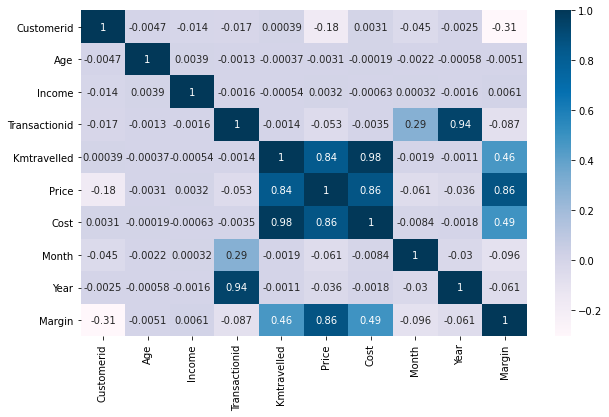

In [24]:
# checking the correlation in order  to identify multicollinearity, an absolute value of 0.5 shows high correlation
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), cmap='PuBu', annot=True)
plt.show()

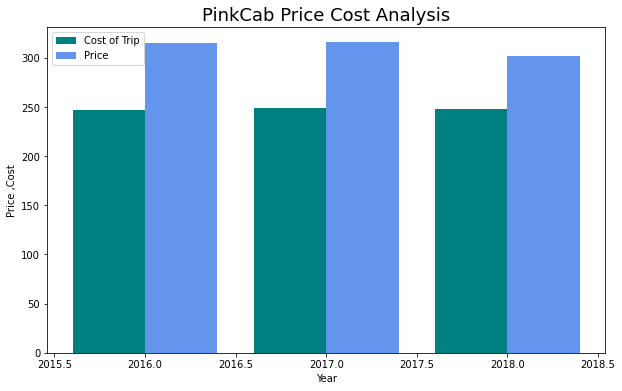

In [25]:
# analysis of price and cost in pink cab
plot1=df[df.Company=='Pink Cab'].groupby('Year'). Transactionid.count()
plot2=df[df.Company=='Pink Cab'].groupby('Year').Price.mean()
plot3=df[df.Company=='Pink Cab'].groupby('Year').Cost.mean()
plt.figure(figsize=(10,6))
ax =plt.subplot(111)
ax.bar(plot1.index-0.2, plot3.values, width=0.4, color='Teal', align='center',label='Cost of Trip')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='Cornflowerblue', align='center',label='Price')
plt.ylabel('Price ,Cost')
plt.xlabel('Year')
plt.title('PinkCab Price Cost Analysis',fontsize=18)
plt.legend()
plt.show()

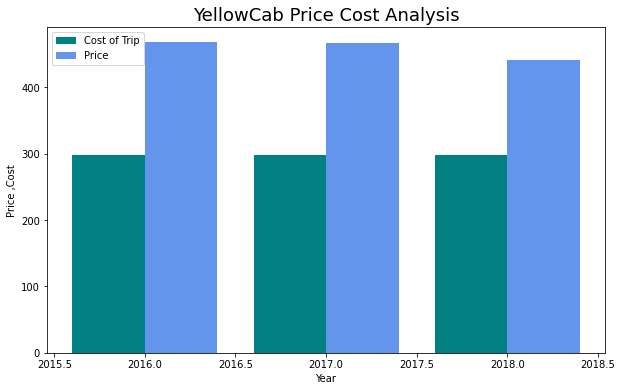

In [26]:
plot1=df[df.Company=='Yellow Cab'].groupby('Year'). Transactionid.count()
plot2=df[df.Company=='Yellow Cab'].groupby('Year').Price.mean()
plot3=df[df.Company=='Yellow Cab'].groupby('Year').Cost.mean()
plt.figure(figsize=(10,6))
ax =plt.subplot(111)
ax.bar(plot1.index-0.2, plot3.values, width=0.4, color='Teal', align='center',label='Cost of Trip')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='Cornflowerblue', align='center',label='Price')
plt.ylabel('Price ,Cost')
plt.xlabel('Year')
plt.title('YellowCab Price Cost Analysis',fontsize=18)
plt.legend()
plt.show()

In [27]:
citymargin = df[df.Month==12].groupby('City').Margin.mean()
citymargin

City
ATLANTA GA         95.844236
AUSTIN TX          90.535487
BOSTON MA          61.158200
CHICAGO IL         49.166594
DALLAS TX         107.653009
DENVER CO         111.229893
LOS ANGELES CA     78.671170
MIAMI FL           98.341176
NASHVILLE TN       78.562585
NEW YORK NY       256.663241
ORANGE COUNTY      71.696141
PHOENIX AZ         72.779471
PITTSBURGH PA      50.946547
SACRAMENTO CA      23.995713
SAN DIEGO CA       67.587428
SEATTLE WA         75.043692
SILICON VALLEY    161.907324
TUCSON AZ          83.594826
WASHINGTON DC      60.778328
Name: Margin, dtype: float64

In [28]:
cabpinkmargin = df[df.Company=='Pink Cab'].groupby('Margin').Transactionid.count()
cabpinkmargin

Margin
-220.060     1
-198.698     1
-168.985     1
-164.040     1
-160.536     1
            ..
 971.170     1
 982.590     1
 1039.080    1
 1056.110    1
 1119.480    1
Name: Transactionid, Length: 70332, dtype: int64

In [29]:
cabyellowmargin = df[df.Company=='Yellow Cab'].groupby('Margin').Transactionid.count()
cabyellowmargin

Margin
-176.9308     1
-160.7140     1
-145.9468     1
-144.7664     1
-144.4464     1
             ..
 1408.3440    1
 1424.1408    1
 1433.3420    1
 1445.2720    1
 1463.9660    1
Name: Transactionid, Length: 250255, dtype: int64

In [30]:
cabpink = df[df.Company=='Pink Cab'].groupby('Year').Transactionid.count()
cabpink

Year
2016    25080
2017    30321
2018    29310
Name: Transactionid, dtype: int64

In [31]:
cabyellow = df[df.Company=='Yellow Cab'].groupby('Year').Transactionid.count()
cabyellow

Year
2016    82239
2017    98189
2018    94253
Name: Transactionid, dtype: int64

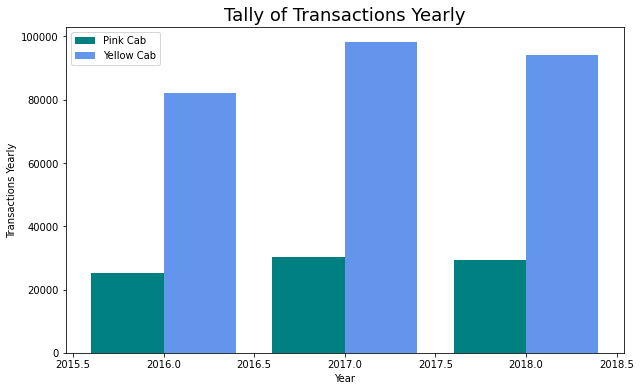

In [32]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.bar(cabpink.index-0.2, cabpink.values, width=0.4, color='Teal', align='center',label='Pink Cab')
ax.bar(cabyellow.index+0.2, cabyellow.values, width=0.4, color='Cornflowerblue', align='center',label='Yellow Cab')
plt.ylabel('Transactions Yearly')
plt.xlabel('Year')
plt.title('Tally of Transactions Yearly',fontsize=18)
plt.legend()
plt.show()

In [33]:
cabpink = df[df.Company=='Pink Cab'].groupby('Month').Transactionid.count()
cabpink

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transactionid, dtype: int64

In [34]:
cabyellow = df[df.Company=='Yellow Cab'].groupby('Month').Transactionid.count()
cabyellow

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transactionid, dtype: int64

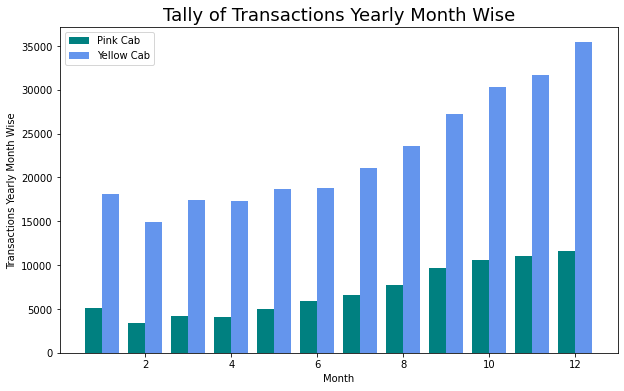

In [35]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.bar(cabpink.index-0.2, cabpink.values, width=0.4, color='Teal', align='center',label='Pink Cab')
ax.bar(cabyellow.index+0.2, cabyellow.values, width=0.4, color='Cornflowerblue', align='center',label='Yellow Cab')
plt.ylabel('Transactions Yearly Month Wise')
plt.xlabel('Month')
plt.title('Tally of Transactions Yearly Month Wise',fontsize=18)
plt.legend()
plt.show()
#transactions are highest in december most probably due to alot of festivities so more use of cab services

In [36]:
#customer age group analysis
customerage= df.groupby('Age').Customerid.nunique()
customerage

Age
18    1450
19    1475
20    1535
21    1476
22    1499
23    1515
24    1442
25    1504
26    1485
27    1489
28    1500
29    1408
30    1457
31    1441
32    1492
33    1407
34    1548
35    1404
36    1433
37    1475
38    1417
39    1524
40    1456
41     491
42     493
43     498
44     458
45     524
46     508
47     503
48     502
49     502
50     509
51     496
52     497
53     479
54     479
55     468
56     490
57     462
58     502
59     517
60     473
61     550
62     462
63     481
64     505
65     467
Name: Customerid, dtype: int64

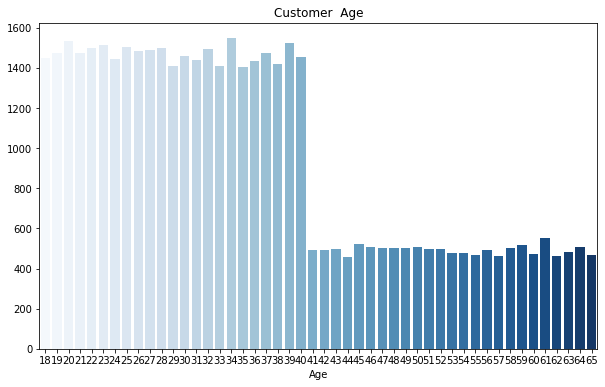

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=customerage.index, y=customerage.values, palette='Blues')
plt.title('Customer  Age')
plt.show()             

In [38]:
df.groupby(['Age','Gender','Company']).Customerid.nunique()

Age  Gender  Company   
18   Female  Pink Cab      485
             Yellow Cab    598
     Male    Pink Cab      543
             Yellow Cab    658
19   Female  Pink Cab      483
                          ... 
64   Male    Yellow Cab    223
65   Female  Pink Cab      161
             Yellow Cab    186
     Male    Pink Cab      171
             Yellow Cab    205
Name: Customerid, Length: 192, dtype: int64

In [39]:
companycustomerage = df.groupby(['Company','Age']).Customerid.agg(['nunique'])
companycustomerage = companycustomerage.reset_index()

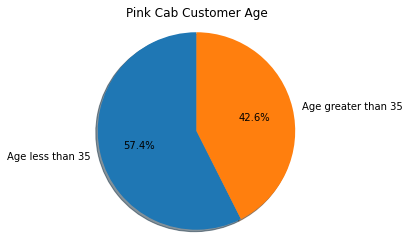

In [40]:
labels = 'Age less than 35','Age greater than 35' 
pct2 = [companycustomerage[(companycustomerage.Age<=35) & (companycustomerage.Company=='Pink Cab')]['nunique'].sum(),companycustomerage[(companycustomerage.Age>35) & (companycustomerage.Company=='Pink Cab')]['nunique'].sum() ]
explode2 = (0.15,0)
fig2, ax2 = plt.subplots()
ax2.pie(pct2 ,labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')
plt.title('Pink Cab Customer Age')
plt.show()

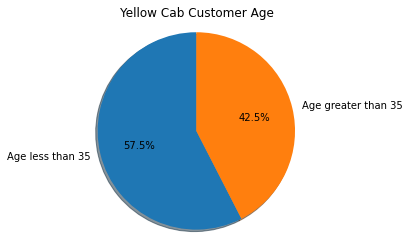

In [41]:
labels = 'Age less than 35','Age greater than 35' 
pct2 = [companycustomerage[(companycustomerage.Age<=35) & (companycustomerage.Company=='Yellow Cab')]['nunique'].sum(),companycustomerage[(companycustomerage.Age>35) & (companycustomerage.Company=='Yellow Cab')]['nunique'].sum()]
explode2 = (0.15,0)
fig2, ax2 = plt.subplots()
ax2.pie(pct2 ,labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')
plt.title('Yellow Cab Customer Age')
plt.show()

In [42]:
df.groupby(['Company']).Transactionid.count()

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transactionid, dtype: int64

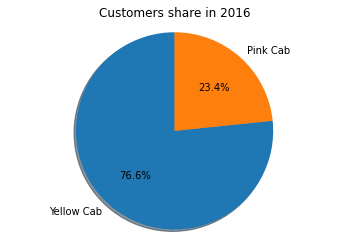

In [43]:
labels = 'Yellow Cab','Pink Cab' 
pct2016 = [df[(df.Year==2016) & (df.Company=='Yellow Cab')]['Customerid'].count(),df[(df.Year==2016) & (df.Company=='Pink Cab')]['Customerid'].count()]
fig7, ax5 = plt.subplots()
ax5.pie(pct2016 , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax5.axis('equal')

plt.title('Customers share in 2016')
plt.show()

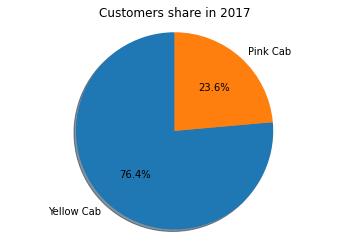

In [44]:
labels = 'Yellow Cab','Pink Cab' 
pct2017 = [df[(df.Year==2017) & (df.Company=='Yellow Cab')]['Customerid'].count(),df[(df.Year==2017) & (df.Company=='Pink Cab')]['Customerid'].count()]
fig7, ax7 = plt.subplots()
ax7.pie(pct2017 , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax7.axis('equal')

plt.title('Customers share in 2017')
plt.show()

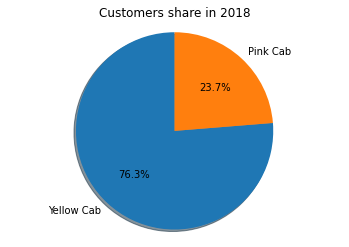

In [45]:
labels = 'Yellow Cab','Pink Cab' 
pct2018 = [df[(df.Year==2018) & (df.Company=='Yellow Cab')]['Customerid'].count(),df[(df.Year==2018) & (df.Company=='Pink Cab')]['Customerid'].count()]
fig8, ax8 = plt.subplots()
ax8.pie(pct2018 , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax8.axis('equal')

plt.title('Customers share in 2018')
plt.show()

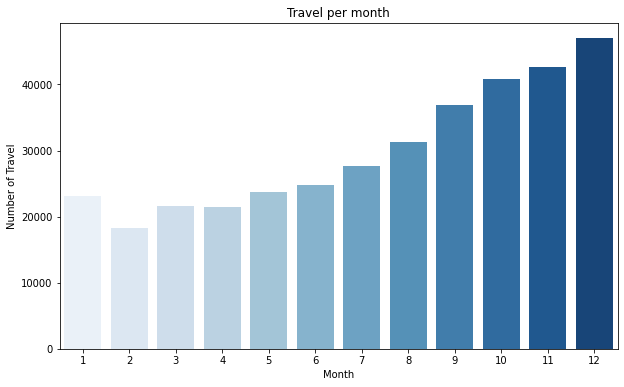

In [46]:
monthlytravel = df.groupby(['Month']).Transactionid.count()
plt.figure(figsize=(10,6))
sns.barplot(x=monthlytravel.index,y=monthlytravel.values, palette='Blues')
plt.xlabel('Month')
plt.ylabel('Number of Travel')
plt.title('Travel per month')
plt.show()

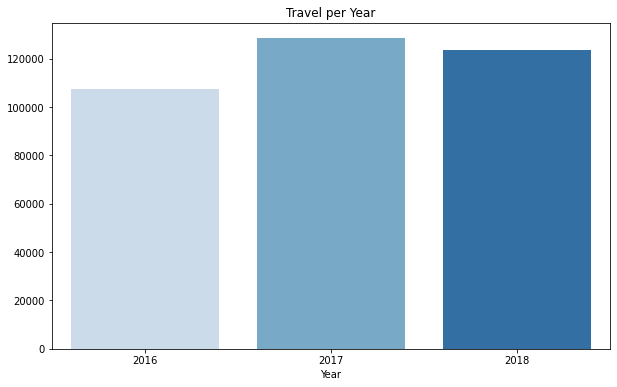

In [47]:
yeartravel = df.groupby(['Year']).Transactionid.count()
plt.figure(figsize=(10,6))
sns.barplot(x=yeartravel.index,y=yeartravel.values, palette='Blues')
plt.title('Travel per Year')
plt.show()

In [48]:
cabpinkcities = df[df.Company=='Pink Cab'].groupby('City').Transactionid.count()
cabpinkcities

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transactionid, dtype: int64

In [49]:
yellowcabcities = df[df.Company=='Yellow Cab'].groupby('City').Transactionid.count()
yellowcabcities

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transactionid, dtype: int64

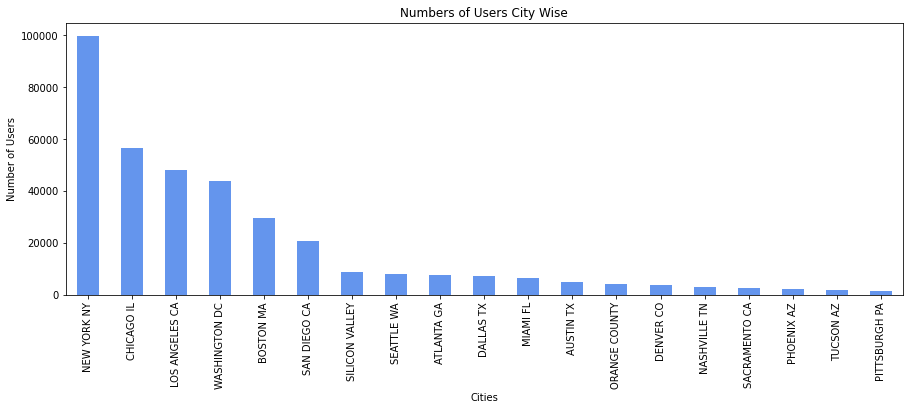

In [50]:
datase=df.groupby('City')['Users'].count().sort_values(ascending=False).plot.bar(figsize=(15,5),color='Cornflowerblue')
plt.ylabel('Number of Users')
plt.xlabel('Cities')
plt.title('Numbers of Users City Wise')
plt.show()
#new york provides the largest market 

In [51]:
df.groupby(['Company','Payment_Mode']).Transactionid.count()
#yellow cab had more transactions regardless the mode of payment

Company     Payment_Mode
Pink Cab    Card             50719
            Cash             33992
Yellow Cab  Card            164785
            Cash            109896
Name: Transactionid, dtype: int64

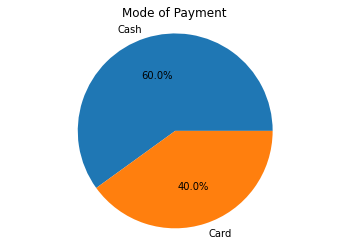

In [52]:
labels = ['Cash', 'Card']
sizes = [(215504),(143888)]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('Mode of Payment')
plt.show()

In [53]:
df.groupby(['Company','Gender']).Price.agg(['mean'])
#yellow cab had a higher mean of both male and female customers  which translates to high number of customers

mean
Company    Gender            
Pink Cab   Female  310.624823
           Male    310.940547
Yellow Cab Female  454.571538
           Male    460.821326

In [54]:
df.groupby('Year').Kmtravelled.mean()

Year
2016    22.582095
2017    22.571804
2018    22.549632
Name: Kmtravelled, dtype: float64

In [55]:
#is there a difference in margin depending on the mode of payment , Yellow Cabs
from scipy import stats
a = df[(df.Payment_Mode=='Cash')&(df.Company=='Yellow Cab')].groupby('Transactionid').Margin.mean()
b = df[(df.Payment_Mode=='Card')&(df.Company=='Yellow Cab')].groupby('Transactionid').Margin.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.29330606382987284


In [56]:
#is there a difference in margin depending on the mode of payment,Pink Cabs
a = df[(df.Payment_Mode=='Cash')&(df.Company=='Pink Cab')].groupby('Transactionid').Margin.mean()
b = df[(df.Payment_Mode=='Card')&(df.Company=='Pink Cab')].groupby('Transactionid').Margin.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [57]:
# Does Gender affect company margin,yellow cabs
a = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transactionid').Margin.mean()
b = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transactionid').Margin.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept alternate hypothesis that theres a difference
P value is  6.060473042494144e-25


In [58]:
#Does gender affect company profit, pink cab
a = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transactionid').Margin.mean()
b = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transactionid').Margin.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres an effect')
else:
    print('We accept null hypothesis that theres no effect')
    
print('P value is ', p_value)

We accept null hypothesis that theres no effect
P value is  0.115153059004258


In [59]:
# Does  gender have an effect on distance travelled, yellow cab
a = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transactionid').Kmtravelled.mean()
b = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transactionid').Kmtravelled.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres an effect')
else:
    print('We accept null hypothesis that theres no effect')
    
print('P value is ', p_value)

We accept null hypothesis that theres no effect
P value is  0.5146654429411317


In [60]:
# Does gender have an effect on distance travelled , pink cab
a = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transactionid').Kmtravelled.mean()
b = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transactionid').Kmtravelled.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres an effect')
else:
    print('We accept null hypothesis that theres no effect')
    
print('P value is ', p_value)

We accept null hypothesis that theres no effect
P value is  0.6164626165258722


In [61]:
#does age affect company preference,Yellow cab
a = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transactionid').Age.mean()
b = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transactionid').Age.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres an effect')
else:
    print('We accept null hypothesis that theres no effect')
    
print('P value is ', p_value)

We accept null hypothesis that theres no effect
P value is  0.08738489267415496


In [62]:
a = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transactionid').Age.mean()
b = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transactionid').Age.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres an effect')
else:
    print('We accept null hypothesis that theres no effect')
    
print('P value is ', p_value)

We accept null hypothesis that theres no effect
P value is  0.2872878897358956


In [63]:
a = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transactionid').Income.mean()
b = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transactionid').Income.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres an effect')
else:
    print('We accept null hypothesis that theres no effect')
    
print('P value is ', p_value)

We accept null hypothesis that theres no effect
P value is  0.6097416516367322


In [64]:
a = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transactionid').Income.mean()
b = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transactionid').Income.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres an effect')
else:
    print('We accept null hypothesis that theres no effect')
    
print('P value is ', p_value)

We accept null hypothesis that theres no effect
P value is  0.6991469526319543


In [65]:
#from this analysis we can see:
#Yellow cab has maintained its dominance on the market through the years
#Margins are affected by gender in Yellow cab this is due to difference in price charged between the gender.
#There is potential for pink cab company to grow.